<a href="https://colab.research.google.com/github/Zafeerahamad/Nural_network/blob/main/mask_detector_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zafeerkhan","key":"a9e5ba75af1ffbaae0056eeac65a7016"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13711  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8243  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3672  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1584  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
! kaggle datasets download -d vijaykumar1799/face-mask-detection

100% 221M/222M [00:01<00:00, 158MB/s]
100% 222M/222M [00:01<00:00, 139MB/s]


In [ ]:
! unzip face-mask-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/with_ma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing

In [ ]:
import cv2,os
data_path='/content/Dataset'
categories=os.listdir(data_path)
categories

['without_mask', 'mask_weared_incorrect', 'with_mask']

### Labelling our categories

In [ ]:
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'mask_weared_incorrect': 1, 'with_mask': 2, 'without_mask': 0}

In [ ]:
# now we are going to fix the image size
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    image_names=os.listdir(folder_path)
    for img_name in image_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path) 
          # here the img will be in the form of BGR and for the face detection 
        #color is not very important feature so we convert the color into Gray format

        try:
            rgb_img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            # resize the image
            resize_rgb=cv2.resize(rgb_img,(img_size,img_size))
            data.append(resize_rgb)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception: ',e)


In [ ]:
data=np.array(data)
data.shape

(8982, 100, 100, 3)

In [ ]:
target=np.array(target)
target.shape

(8982,)

In [ ]:
data=data/255.0
reshaped_data=np.reshape(data,(data.shape[0],img_size,img_size,3))

In [ ]:
reshaped_data.shape

(8982, 100, 100, 3)

In [ ]:
data.shape

(8982, 100, 100, 3)

In [ ]:
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

(8982, 3)

## CNN model creation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Convolution2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [ ]:
model= Sequential()
model.add(Convolution2D(100,3,padding='same',activation='relu',input_shape=data.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(50,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics='accuracy')


In [ ]:
#model.summary()

## Now we are going split our data

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [ ]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


In [ ]:
history= model.fit(train_data,train_target,epochs=20,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/20
180/180 [==============================] - 39s 48ms/step - loss: 0.2930 - accuracy: 0.8067 - val_loss: 0.1603 - val_accuracy: 0.9061
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
180/180 [==============================] - 8s 44ms/step - loss: 0.1331 - accuracy: 0.9276 - val_loss: 0.1201 - val_accuracy: 0.9388
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
180/180 [==============================] - 8s 44ms/step - loss: 0.1010 - accuracy: 0.9471 - val_loss: 0.1053 - val_accuracy: 0.9478
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
180/180 [==============================] - 8s 44ms/step - loss: 0.0813 - accuracy: 0.9570 - val_loss: 0.0952 - val_accuracy: 0.9471
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
180/180 [==============================] - 8s 44ms/step - loss: 0.0650 - accuracy: 0.9652 - val_loss: 0.0495 - val_accuracy: 0.9777
INFO:tensorflow:Assets written to: model-005.model/a

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Mask_Detection/model_mask.h5')

In [ ]:
model.evaluate(test_data,test_target)

57/57 [==============================] - 1s 19ms/step - loss: 0.0540 - accuracy: 0.9772


[0.053990550339221954, 0.9771841764450073]

In [ ]:
h=history.history

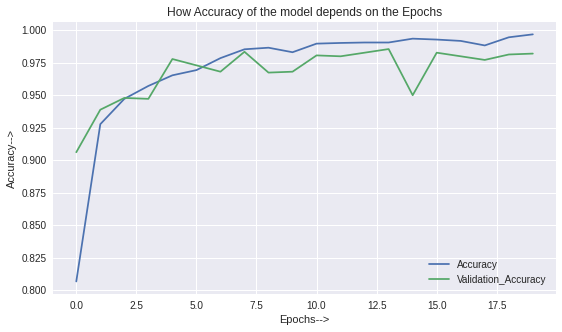

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.plot(h['accuracy'],label='Accuracy')
plt.plot(h['val_accuracy'],label='Validation_Accuracy')
plt.xlabel("Epochs-->")
plt.ylabel("Accuracy-->")
plt.title("How Accuracy of the model depends on the Epochs")

plt.legend()
plt.show()

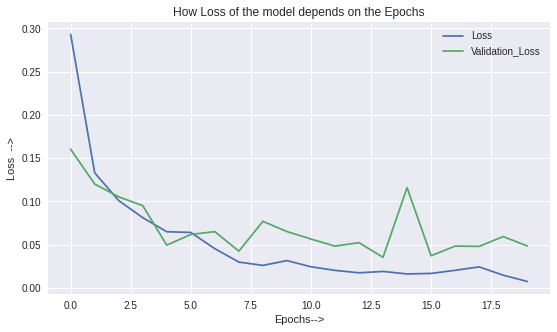

In [ ]:

plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.plot(h['loss'],label='Loss')
plt.plot(h['val_loss'],label='Validation_Loss')
plt.xlabel("Epochs-->")
plt.ylabel("Loss  -->")
plt.title("How Loss of the model depends on the Epochs")

plt.legend()
plt.show()

# testing of model

In [ ]:
classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
vid = cv2.VideoCapture(0)
x=list(label_dict.keys())
y=list(label_dict.values())
index_label=dict(zip(y,x))
color_label={0:(255,0,0),1:(0,0,255),2:(0,255,0)}


  



In [ ]:
vid = cv2.VideoCapture(0)
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    rgb_img= cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    faces=classifier.detectMultiScale(rgb_img)

    for x,y,w,h in faces:
        face_img=rgb_img[y:y+h,x:x+w]
        resized_face_img=cv2.resize(face_img,(100,100))
        normalized=resized_face_img/255.0

        reshaped=np.reshape(normalized,(1,100,100,3))

        result=model.predict(reshaped)
        label= np.argmax(result)[0]

  
    # Display the resulting frame
    cv2.imshow('Live', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

error: ignored

In [ ]:
vid = cv2.VideoCapture()
ret, frame = vid.read()

None


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


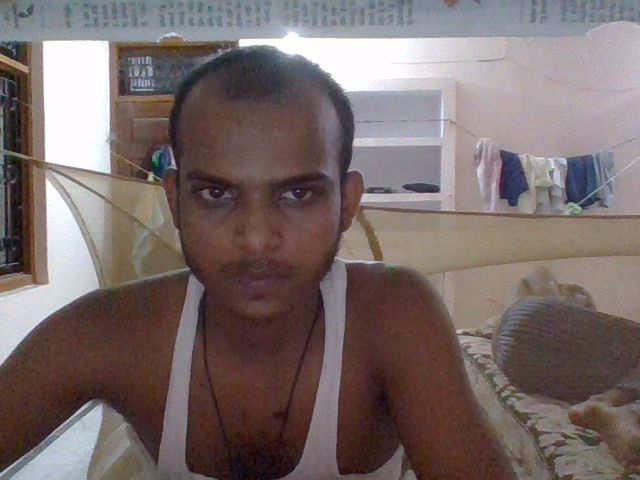

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# If we are working in Google colab, we can display our captured frame
# with a function cv2_imshow(). If not, we use the function cv2.imshow().
from google.colab.patches import cv2_imshow

In [ ]:
# Create a VideoCapture object
cap=cv2.VideoCapture("Video.mp4")
# Capture or input video frame-by-frame 
for i in range(10):
  ret, frame=cap.read()
  # Display the captured frame
cv2_imshow(frame)

AttributeError: ignored